# 01. Neural Network Regression with TensorFlow



## Typical architecture of a regresison neural network


| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*



## Improving a model

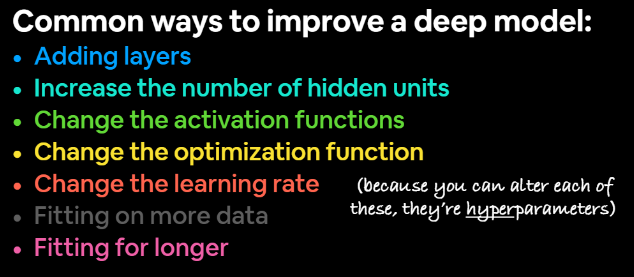

## Insurance Dataset

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).



In [25]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [5]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Normalize Data

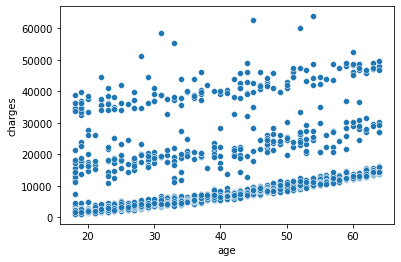

In [6]:
sns.scatterplot(insurance['age'], insurance['charges']);

In [7]:
#Age Groups
#group = (10, 28, 36, 44, 120)
#cats = ['STUDENT', 'YOUNG', 'ADULT', 'OLD']
#insurance["age_group"] = pd.cut(insurance.age, group, labels=cats)

In [18]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

target = ["charges"]

continuous_columns = ["age", "bmi"]
categorical_columns = ["region", "smoker", "sex", "children"]
# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), continuous_columns), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse=False), categorical_columns)
)

# Create X & y
X = insurance.drop(target, axis=1)
y = insurance[target].astype(float)

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [19]:
print("X_train",X_train_normal.shape, "Type:", type(X_train_normal))
print("X_test",X_test_normal.shape, "Type:", type(X_test_normal))

X_train (1070, 14) Type: <class 'numpy.ndarray'>
X_test (268, 14) Type: <class 'numpy.ndarray'>


In [20]:
ct.get_feature_names_out()

array(['minmaxscaler__age', 'minmaxscaler__bmi',
       'onehotencoder__region_northeast',
       'onehotencoder__region_northwest',
       'onehotencoder__region_southeast',
       'onehotencoder__region_southwest', 'onehotencoder__smoker_yes',
       'onehotencoder__sex_male', 'onehotencoder__children_0',
       'onehotencoder__children_1', 'onehotencoder__children_2',
       'onehotencoder__children_3', 'onehotencoder__children_4',
       'onehotencoder__children_5'], dtype=object)

In [21]:
#Converter para DataFrame
X_train_normal = pd.DataFrame(X_train_normal, columns=ct.get_feature_names_out())
X_test_normal = pd.DataFrame(X_test_normal, columns=ct.get_feature_names_out())

In [22]:
X_train_normal.head()

,minmaxscaler__age,minmaxscaler__bmi,onehotencoder__region_northeast,onehotencoder__region_northwest,onehotencoder__region_southeast,onehotencoder__region_southwest,onehotencoder__smoker_yes,onehotencoder__sex_male,onehotencoder__children_0,onehotencoder__children_1,onehotencoder__children_2,onehotencoder__children_3,onehotencoder__children_4,onehotencoder__children_5
0,0.608696,0.107345,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.630435,0.224913,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.739130,0.239440,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.456522,0.493947,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.782609,0.148238,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Baseline Model

In [13]:
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, SGDRegressor, ElasticNet,LogisticRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [23]:
df_results = pd.DataFrame(columns=['Modelo', 'R2', "mean_absolute_error","rmse", "mean_squared_error"])

model_xgb = XGBRegressor(colsample_bytree=0.7, 
                          #gamma=0.0468,
                          learning_rate=0.05, 
                          max_depth=3,
                          #min_child_weight=2.0, 
                          n_estimators=200,
                          reg_alpha=0.5, 
                          reg_lambda=0.88,
                          subsample=1,
                          random_state=8, 
                          nthread = -1
                        )

regressores = {
    'XGBRegressor': model_xgb #XGBRegressor(learning_rate=0.05,max_depth=5, n_estimators=200)
    ,'Lasso': Lasso(alpha=0.0005,random_state=8)
    #,'SGDRegressor': SGDRegressor(random_state=8)
    ,'ElasticNet': ElasticNet(alpha=0.0005,random_state=8)
    ,'GradientBoosting': GradientBoostingRegressor(learning_rate=0.04,n_estimators=100,random_state=8)
    ,'Ridge': Ridge( solver="cholesky",random_state=8)
    ,'AdaBoostRegressor': AdaBoostRegressor(n_estimators=500,learning_rate=0.05,random_state=8)
    #,'CatBoostRegressor': CatBoostRegressor(iterations=200,learning_rate=0.05,depth=2,l2_leaf_reg= 0.2,verbose=False,random_state=8)
}

modelos_treinados = {}

for no_modelo, modelo in regressores.items():
  dict_result = {}
  my_pipeline = Pipeline(
      steps=[
              ('model', modelo)
      ]
  )

  model_to_deploy = my_pipeline.fit(X_train_normal, y_train)

  #Calcular dados de treino
  y_pred = my_pipeline.predict(X_test_normal)

  dict_result['Modelo'] = no_modelo
  dict_result['R2'] = r2_score(y_test, y_pred)
  dict_result["mean_absolute_error"] = mean_absolute_error(y_test, y_pred)
  dict_result["rmse"] = np.sqrt(mean_squared_error(y_test, y_pred))
  dict_result["mean_squared_error"] = mean_squared_error(y_test, y_pred)

  df_results = df_results.append(dict_result, ignore_index=True)

[12:52:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [26]:
df_results.sort_values('mean_absolute_error', ascending=True)

,Modelo,R2,mean_absolute_error,rmse,mean_squared_error
0,XGBRegressor,0.88,"2,456.11","4,398.79","19,349,362.22"
3,GradientBoosting,0.88,"2,511.80","4,358.52","18,996,721.14"
4,Ridge,0.78,"4,210.41","5,813.57","33,797,644.71"
2,ElasticNet,0.78,"4,213.47","5,810.81","33,765,557.61"
1,Lasso,0.78,"4,214.91","5,810.03","33,756,426.76"
5,AdaBoostRegressor,0.83,"4,247.82","5,165.39","26,681,213.70"


# Modeling

Parameter Mode of the Callback **tf.keras.callbacks.ModelCheckpoint**
```
Mode : one of {'auto', 'min', 'max'}. If save_best_only=True, the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity. For val_acc, this should be max, for val_loss this should be min, etc. In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' and are set to min for the rest of the quantities.
```

In [79]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(75, activation="relu"),
  tf.keras.layers.Dense(25, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="relu")
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(lr=0.01),
                          metrics=['mae'])

#Verificar o melhor Learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) 

# O parâmetro patience é o quantidade de epochs para checar as melhoras
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

# Callback to save the best weights during training process
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train_normal,
                                y_train,
                                epochs=500,
                                validation_data=(X_test_normal, y_test),
                                # Callbacks: Checkpoint: Model weights are saved at the end of every epoch, if it's the best seen
                                callbacks=[model_checkpoint_callback, early_stop],
                                verbose=0)

# The model weights (that are considered the best) are loaded into the model.
insurance_model_2.load_weights(checkpoint_filepath)

In [80]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1535.9773 - mae: 1535.9773


[1535.977294921875, 1535.977294921875]

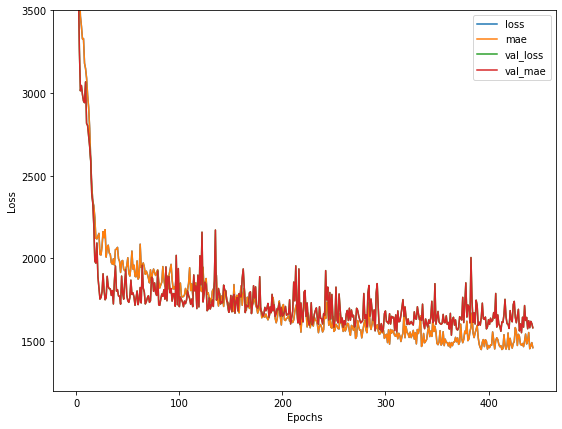

In [88]:
pd.DataFrame(history.history).plot(figsize=(9,7))
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.ylim(1200, 3500);

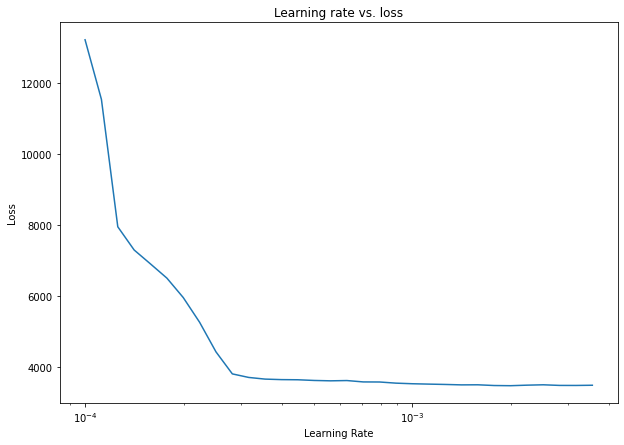

In [ ]:
# Plot the learning rate versus the loss
epochs = len(history.history["loss"])
lrs = 1e-4 * (10 ** (np.arange(epochs)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
insurance["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

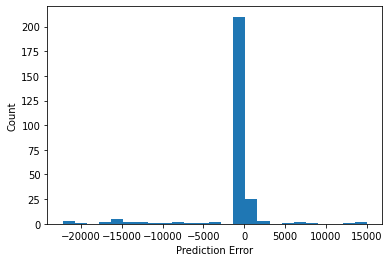

In [89]:
y_pred = insurance_model_2.predict(X_test_normal)
error = y_pred - y_test.to_numpy()
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")